In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Tratando o df com os países com dados para PIB per capita
df_paises = pd.read_excel("countries data.xls", header = 3)
#interpolar os dados nulos por regressões lineares
df_paises_interpolated = df_paises.interpolate(method='linear', axis=0)

#filtrar as colunas que não utilizaremos e as regiões que não são reconhecidas como países e/ou não se encontram nos outros df's
df_paises_filtered = df_paises.drop(columns=df_paises.columns.difference(['Country Name', 'Country Code', 'Indicator Name', '2019']), axis=1)
df_paises = df_paises_filtered
drop_regions = ["Africa Eastern and Southern", "Aruba", "Africa Western and Central", "Channel Islands", "Arab World", "Central Europe and the Baltics","High Income", 
                "Caribbean small states", "Curacao", 'Cayman Islands', "East Asia & Pacific (excluding high income)", "Early-demographic dividend", "South Asia (IDA & IBRD)", 
                "East Asia & Pacific", "Europe & Central Asia (excluding high income)", "Europe & Central Asia", "Euro area", "European Union", "Other small states", 
                "Fragile and conflict affected situations", "Liechtenstein", "Faroe Islands", "Gibraltar", "Hong Kong SAR, China", "Heavily indebted poor countries (HIPC)", "IBRD only", 
                "IDA & IBRD total", "IDA total", "IDA blend", "Indonesia", "IDA only", "Isle of Man", "Not classified", "Latin America & Caribbean (excluding high income)", 
                "Latin America & Caribbean", "Least developed countries: UN classification", "Low income", "Lower middle income", "Low & middle income", "Late-demographic dividend", 
                "Macao SAR, China", "St. Martin (French part)", "Middle income","Middle East & North Africa (excluding high income)", "North America", "New Caledonia","Greece", "OECD members",
                "Pre-demographic dividend", "Pacific island small states", "Post-demographic dividend", "French Polynesia", "Sub-Saharan Africa (excluding high income)", 
                'Sub-Saharan Africa', "Small states", "Sint Maarten (Dutch part)" , "Turks and Caicos Islands","East Asia & Pacific (IDA & IBRD countries)", 
                "Europe & Central Asia (IDA & IBRD countries)", "Latin America & the Caribbean (IDA & IBRD countries)", "Middle East & North Africa (IDA & IBRD countries)", 
                "Sub-Saharan Africa (IDA & IBRD countries)", "Upper middle income", "British Virgin Islands", "Virgin Islands (U.S.)", "World", "Kosovo"]
mask = ~df_paises['Country Name'].isin(drop_regions)
df_paises = df_paises[mask]

df_paises.head()

,Country Name,Country Code,Indicator Name,2019
2,Afghanistan,AFG,GDP (current US$),1.879944e+10
4,Angola,AGO,GDP (current US$),7.089796e+10
5,Albania,ALB,GDP (current US$),1.540183e+10
6,Andorra,AND,GDP (current US$),3.155150e+09
8,United Arab Emirates,ARE,GDP (current US$),4.179897e+11


In [2]:
import pandas as pd
#Tratando o df com os dados de expectativa de vida dos países
df_saude = pd.read_csv("IHME.csv")
#apagando as linhas desnecessárias para a análise
columns_to_drop = ['upper', 'lower', 'measure', 'sex', 'age', 'metric']
df_saude_filtered = df_saude.drop(columns_to_drop, axis=1)
#filtrando os dados para o ano mais recente
df_saude_filtered = df_saude_filtered[df_saude_filtered['year'] == 2019]
df_saude_filtered.rename(columns={'val': 'Life Expectancy (years)'}, inplace=True)
df_saude = df_saude_filtered
df_saude.head()

,location,year,Life Expectancy (years)
10,People's Republic of China,2019,68.526100
21,Democratic People's Republic of Korea,2019,64.971139
32,Republic of Kiribati,2019,53.536979
43,Republic of the Marshall Islands,2019,57.382093
54,Republic of Sudan,2019,61.422774


In [4]:
pip install python-Levenshtein
pip install recordlinkage

SyntaxError: invalid syntax (320752154.py, line 1)

In [5]:
import pandas as pd
from fuzzywuzzy import process

#correções para conexões que o método 'fuzzywuzzy' fez equivocadamente 

correcoes = {
    'Bahamas, The': 'Commonwealth of the Bahamas',
    'Channel Islands': 'Channel Islands',
    'France': 'French Republic',
    'Gambia, The': 'Republic of the Gambia',
    'Iran, Islamic Rep.': 'Islamic Republic of Iran',
    'Oman': 'Sultanate of Oman',
    'West Bank and Gaza': 'Palestine'
}

# Aplicar correções manualmente
for pais_errado, pais_correto in correcoes.items():
    df_paises.loc[df_paises['Country Name'] == pais_errado, 'Country Name'] = pais_correto

# fazendo as correspondências com 'fuzzeywuzzy'
countries_df_paises = df_paises['Country Name'].unique()
countries_df_saude = df_saude['location'].unique()

matches = {}
for country_df_paises in countries_df_paises:
    match = process.extractOne(country_df_paises, countries_df_saude)
    matches[country_df_paises] = match[0]

# Criar uma nova coluna com os países correspondentes
df_paises['Matched Country Name'] = df_paises['Country Name'].map(matches)

# Criar uma cópia do DataFrame
df_paises = df_paises.copy()

# Mesclar com o DataFrame df_saude
merged_df = pd.merge(df_paises, df_saude, left_on='Matched Country Name', right_on='location', how='inner')

# Remover as colunas redundantes
merged_df.drop(['Matched Country Name', 'year', 'location'], axis=1, inplace=True)

merged_df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10312\1314972716.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paises['Matched Country Name'] = df_paises['Country Name'].map(matches)


,Country Name,Country Code,Indicator Name,2019,Life Expectancy (years)
0,Afghanistan,AFG,GDP (current US$),1.879944e+10,54.111276
1,Angola,AGO,GDP (current US$),7.089796e+10,56.745929
2,Albania,ALB,GDP (current US$),1.540183e+10,68.859483
3,Andorra,AND,GDP (current US$),3.155150e+09,70.878305
4,United Arab Emirates,ARE,GDP (current US$),4.179897e+11,64.379104


In [6]:
#Tratando o df com os dados para características de cada país
df_class = pd.read_excel("CLASS.xlsx")
df_class = df_class.rename(columns={'Code': 'Country Code'})
df_class.head()

,Economy,Country Code,Region,Income group,Lending category
0,Aruba,ABW,Latin America & Caribbean,High income,NaN
1,Afghanistan,AFG,South Asia,Low income,IDA
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD
3,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [7]:
#unindo os dfs
merged_df = pd.merge(merged_df, df_class)
merged_df.head()
#enunciando as regiões globais únicas dentre os países do globo (classificação do Banco Mundial)
unique_regions = merged_df['Region'].unique()
print(unique_regions)

['South Asia' 'Sub-Saharan Africa' 'Europe & Central Asia'
 'Middle East & North Africa' 'Latin America & Caribbean'
 'East Asia & Pacific' 'North America' nan]


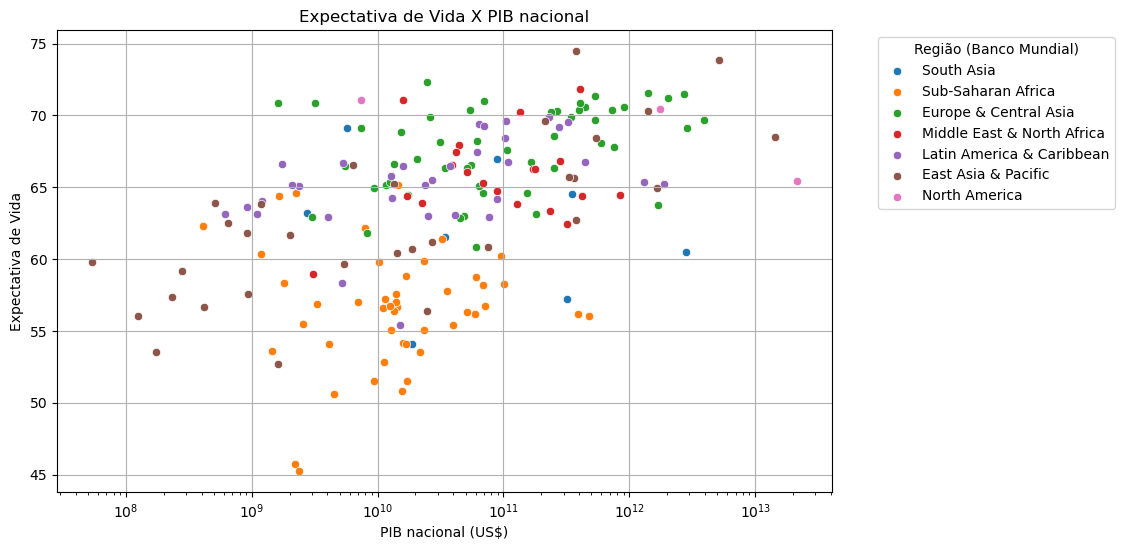

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

regions = merged_df['Region'].unique()

#criando sistema de cor para as regiões
palette = sns.color_palette("tab10", len(regions))

#criando gráfico de dispersão
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    region_data = merged_df[merged_df['Region'] == region]
    sns.scatterplot(data=region_data, x='2019', y='Life Expectancy (years)', label=region, color=palette[i])
plt.xscale('log') 
plt.xlabel('PIB nacional (US$)')
plt.ylabel('Expectativa de Vida (anos)')
plt.title('Expectativa de Vida X PIB nacional (dados de 2019)')
plt.legend(title='Região (Banco Mundial)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Observa-se, graficamente, portanto, uma tendência de correlação entre a riqueza nacional (medida no PIB anual) e a expectativa de vida da população que nele habita. Para além disso, o gráfico indica que essas diferenças de expectativas de vida. Em geral, países com PIB mais alto tendem a ter uma expectativa de vida mais alta, mas essa relação varia significativamente entre as diferentes regiões do mundo. Além disso, há discrepâncias entre as regiões do globo em termos de riqueza, expectativa de vida, e da força da correlação entre as duas variáveis.





